## Кластеризация текста

### Установка недостающиуй библиотеки

In [6]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


## Подключение библиотек

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import re
import nltk
import pymorphy3

from nltk.stem.snowball import SnowballStemmer

#### Подключение датасета

In [8]:
df = pd.read_csv('films250.csv')

#### Просмотр информации в датасете

In [9]:
df.head()

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama"
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama"
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama"
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama"


#### Описание набора данных

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Название          250 non-null    object 
 1   Год выпуска       250 non-null    int64  
 2   Длительность      250 non-null    object 
 3   Описание_перевод  250 non-null    object 
 4   Рейтинг           250 non-null    float64
 5   Страна            250 non-null    object 
 6   Жанр              250 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.8+ KB


## Предварительная обработка данных

## Этапы обработки
* Перевод букв в нижний регистр
* Удаление знаков препинания
* Удаление стоп слов
* Лемматизация
* Токенизация по словам

In [29]:
df['Описание_перевод'][0]

'Банкир, осужденный за уксорицид, образует дружбу за четверть века с закаленным осужденным, сохраняя при этом его невиновность и пытаясь оставаться надежды на простое сострадание.'

In [31]:
df['Описание_перевод'][200]

'Кино -проекционист жаждет стать детективом и ставит свои скудные навыки на работу, когда его создает соперник за кражу карманных часов его подруги.'

In [33]:
st = '\xa0—'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [35]:
df['prep_text']= [remove_othersymbol(text.lower()) for text in df['Описание_перевод']]

In [37]:
df['prep_text'][0]

'банкир, осужденный за уксорицид, образует дружбу за четверть века с закаленным осужденным, сохраняя при этом его невиновность и пытаясь оставаться надежды на простое сострадание.'

In [39]:
df['prep_text'][200]

'кино -проекционист жаждет стать детективом и ставит свои скудные навыки на работу, когда его создает соперник за кражу карманных часов его подруги.'

In [41]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
def remove_punctuation(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

In [45]:
df['prep_text']= [remove_punctuation(text) for text in df['prep_text']]

In [47]:
df['prep_text'][0]

'банкир осужденный за уксорицид образует дружбу за четверть века с закаленным осужденным сохраняя при этом его невиновность и пытаясь оставаться надежды на простое сострадание'

In [49]:
df['prep_text'][200]

'кино проекционист жаждет стать детективом и ставит свои скудные навыки на работу когда его создает соперник за кражу карманных часов его подруги'

In [51]:
def remove_latin(text):
    return re.sub('[a-z]','', text, flags=re.I)

In [53]:
df.head()

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,prep_text
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,банкир осужденный за уксорицид образует дружбу...
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama",когда угроза известная как джокер наносит ущер...
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 х ...
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью йор...


In [55]:
russian_stopwords = stopwords.words("russian")

In [57]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','свой','своём','всем','всё','её','оба','ещё','должный']) 

In [59]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rakhm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [61]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [63]:
%%time
lemm_texts_list = []
for text in (df['prep_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: total: 906 ms
Wall time: 923 ms


In [65]:
df.head()

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,prep_text,text_lemm
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,банкир осужденный за уксорицид образует дружбу...,банкир осудить за уксорицид образовать дружба ...
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama",когда угроза известная как джокер наносит ущер...,когда угроза известный как джокер наносить уще...
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 х ...,ранний жизнь и карьера вить корлеон в 1920 х г...
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью йор...,присяжный в суд по дело о убийство в нью йорк ...


In [67]:
df['text_lemm'][0]

'банкир осудить за уксорицид образовать дружба за четверть век с закалённый осудить сохранять при это он невиновность и пытаться оставаться надежда на простой сострадание'

In [69]:
df['text_lemm'][200]

'кино проекционист жаждать стать детектив и ставить свой скудный навык на работа когда он создавать соперник за кража карманный час он подруга'

In [71]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [73]:
df['tokenize_text'] = [tokenize(text) for text in df['text_lemm']]

In [75]:
df.head()

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,prep_text,text_lemm,tokenize_text
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,банкир осужденный за уксорицид образует дружбу...,банкир осудить за уксорицид образовать дружба ...,банкир осудить уксорицид образовать дружба чет...
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...,старение патриарх организовать криминальный ди...
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama",когда угроза известная как джокер наносит ущер...,когда угроза известный как джокер наносить уще...,угроза известный джокер наносить ущерб хаос на...
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 х ...,ранний жизнь и карьера вить корлеон в 1920 х г...,ранний жизнь карьера вить корлеон 1920 х год и...
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью йор...,присяжный в суд по дело о убийство в нью йорк ...,присяжный суд дело убийство нью йорк разочаров...


In [77]:
df['tokenize_text'][0]

'банкир осудить уксорицид образовать дружба четверть век закалённый осудить сохранять невиновность пытаться оставаться надежда простой сострадание'

In [79]:
df['tokenize_text'][200]

'кино проекционист жаждать стать детектив ставить скудный навык работа создавать соперник кража карманный час подруга'

## Облако слов

In [82]:
pip install WordCloud

In [83]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

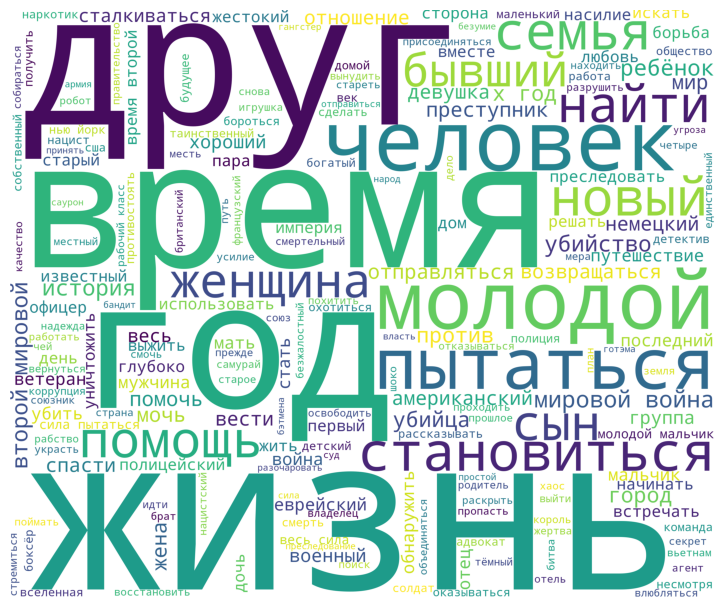

In [85]:
corpus = get_corpus(df['tokenize_text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [86]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

<Axes: >

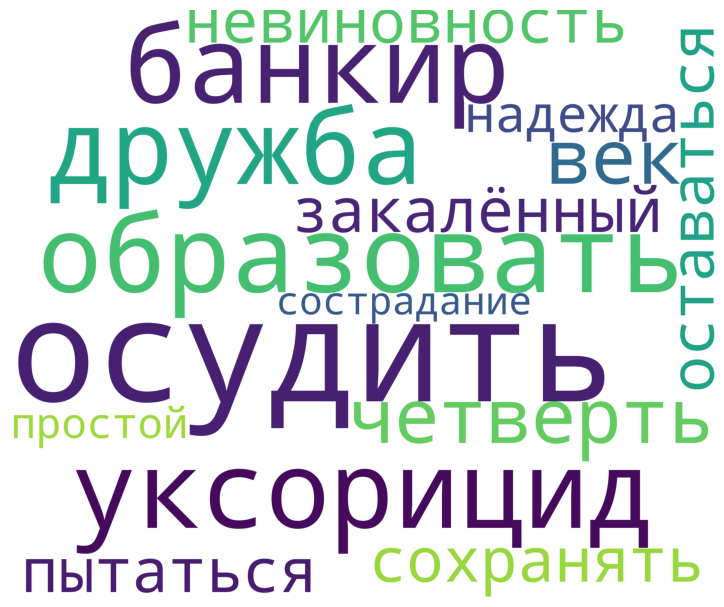

In [87]:
corpus = df['tokenize_text'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

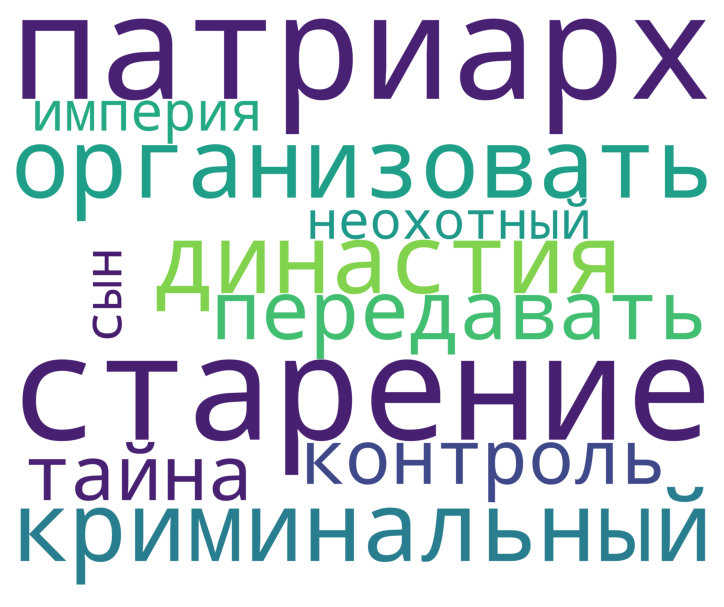

In [88]:
corpus = df['tokenize_text'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

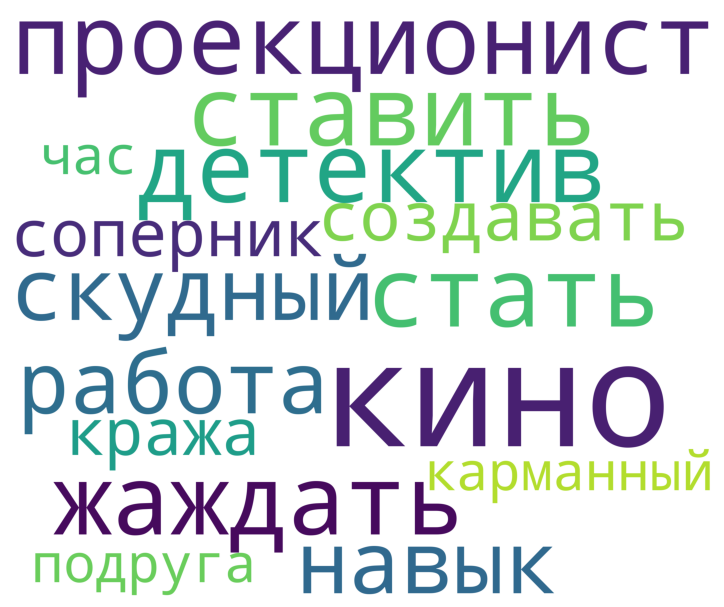

In [90]:
corpus = df['tokenize_text'][200]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [98]:
import re
from collections import Counter

def remove_most_common_words(text, num_words=10):
   
    words = re.findall(r"\b[a-zA-Zа-яА-ЯёЁ]+\b", text.lower())
    
    word_counts = Counter(words)
    
    most_common = [word for word, count in word_counts.most_common(num_words)]

    #print(word_counts)
    
    pattern = re.compile(r"\b(" + "|".join(map(re.escape, most_common)) + r")\b", flags=re.IGNORECASE)
    cleaned_text = pattern.sub("", text)
    
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()

    return cleaned_text

In [100]:
df['tokenize_text'][0]

'банкир осудить уксорицид образовать дружба четверть век закалённый осудить сохранять невиновность пытаться оставаться надежда простой сострадание'

In [102]:
cleaned_text = remove_most_common_words(df['tokenize_text'][0], 5)
print("Очищенный текст:", cleaned_text)

Очищенный текст: четверть век закалённый сохранять невиновность пытаться оставаться надежда простой сострадание


In [104]:
cleaned_text = remove_most_common_words(df['tokenize_text'][200], 5)
print("Очищенный текст:", cleaned_text)

Очищенный текст: ставить скудный навык работа создавать соперник кража карманный час подруга


In [106]:
df['tokenize_text2'] = [remove_most_common_words(text, 5) for text in df['tokenize_text']]

In [108]:
df.head()

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,prep_text,text_lemm,tokenize_text,tokenize_text2
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,банкир осужденный за уксорицид образует дружбу...,банкир осудить за уксорицид образовать дружба ...,банкир осудить уксорицид образовать дружба чет...,четверть век закалённый сохранять невиновность...
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...,старение патриарх организовать криминальный ди...,передавать контроль тайна империя неохотный сын
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama",когда угроза известная как джокер наносит ущер...,когда угроза известный как джокер наносить уще...,угроза известный джокер наносить ущерб хаос на...,хаос народ готэма бэтмена джеймс гордон харви ...
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 х ...,ранний жизнь и карьера вить корлеон в 1920 х г...,ранний жизнь карьера вить корлеон 1920 х год и...,1920 х год изображаться время сын майкл расшир...
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью йор...,присяжный в суд по дело о убийство в нью йорк ...,присяжный суд дело убийство нью йорк разочаров...,йорк разочаровать член чей скептически осторож...


In [110]:
df['tokenize_text2'][0]

'четверть век закалённый сохранять невиновность пытаться оставаться надежда простой сострадание'

In [112]:
df['tokenize_text2'][200]

'ставить скудный навык работа создавать соперник кража карманный час подруга'

In [114]:
df['tokenize_text2'][3]

'1920 х год изображаться время сын майкл расширять подтягивать власть отношение синдикат семейный преступность'

In [116]:
df['tokenize_text'][3]

'ранний жизнь карьера вить корлеон 1920 х год изображаться время сын майкл расширять подтягивать власть отношение синдикат семейный преступность'

In [118]:
df['Описание_перевод'][3]

'Ранняя жизнь и карьера Вито Корлеоне в 1920 -х годах изображаются, в то время как его сын Майкл расширяет и подтягивает свою власть в отношении синдиката по семейной преступности.'

## Векторизация текстовых данных

### Bag of words

In [122]:
vectorizer = CountVectorizer()
count_matrix1 = vectorizer.fit(df['tokenize_text2'])

In [124]:
len(vectorizer.vocabulary_)

1679

In [126]:
print(vectorizer.vocabulary_)

{'четверть': 1626, 'век': 182, 'закалённый': 448, 'сохранять': 1389, 'невиновность': 803, 'пытаться': 1190, 'оставаться': 910, 'надежда': 760, 'простой': 1165, 'сострадание': 1386, 'передавать': 970, 'контроль': 623, 'тайна': 1470, 'империя': 522, 'неохотный': 822, 'сын': 1465, 'хаос': 1594, 'народ': 780, 'готэма': 325, 'бэтмена': 170, 'джеймс': 368, 'гордон': 320, 'харви': 1596, 'дента': 354, 'работать': 1194, 'вместе': 213, 'положить': 1038, 'конец': 614, 'безумие': 111, '1920': 10, 'год': 312, 'изображаться': 513, 'время': 260, 'майкл': 685, 'расширять': 1224, 'подтягивать': 1019, 'власть': 208, 'отношение': 929, 'синдикат': 1316, 'семейный': 1301, 'преступность': 1112, 'йорк': 559, 'разочаровать': 1209, 'член': 1629, 'чей': 1618, 'скептически': 1326, 'осторожность': 917, 'заставлять': 468, 'тщательно': 1523, 'рассмотреть': 1221, 'доказательство': 386, 'прежде': 1100, 'принять': 1130, 'поспешный': 1062, 'приговор': 1120, 'против': 1167, 'армия': 87, 'саурон': 1281, 'привлечь': 1118,

In [128]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['tokenize_text'])

In [130]:
count_matrix.shape

(250, 739)

In [132]:
vectorizer.get_feature_names_out()[160:200]

array(['джон', 'джонс', 'диктатор', 'директор', 'доброта', 'доллар',
       'дом', 'домой', 'дорога', 'доставить', 'дочь', 'друг', 'друг друг',
       'думать', 'дух', 'еврейский', 'единственный', 'жаждать',
       'железный', 'жена', 'женщина', 'жертва', 'жестокий', 'жизнь',
       'жизнь молодой', 'жизнь отметить', 'житель', 'жить',
       'жонглировать', 'журналист', 'заботиться', 'завидовать',
       'загадочный', 'задача', 'заклинание', 'заключение', 'заключить',
       'закон', 'запад', 'запрет'], dtype=object)

In [134]:
print(count_matrix)

  (0, 371)	1
  (0, 61)	1
  (0, 530)	1
  (0, 327)	1
  (0, 512)	1
  (0, 617)	1
  (1, 420)	1
  (1, 225)	1
  (1, 657)	1
  (2, 683)	1
  (2, 219)	1
  (2, 710)	1
  (2, 336)	1
  (2, 138)	1
  (2, 57)	1
  (2, 159)	1
  (2, 535)	1
  (2, 83)	1
  (2, 446)	1
  (2, 258)	1
  (2, 30)	1
  (2, 447)	1
  (3, 657)	1
  (3, 183)	1
  (3, 244)	1
  :	:
  (247, 340)	1
  (247, 531)	1
  (247, 36)	1
  (247, 602)	1
  (248, 179)	2
  (248, 362)	1
  (248, 20)	1
  (248, 180)	1
  (248, 498)	1
  (248, 217)	1
  (248, 419)	1
  (248, 188)	1
  (248, 563)	1
  (249, 530)	1
  (249, 718)	1
  (249, 641)	1
  (249, 622)	1
  (249, 676)	1
  (249, 532)	1
  (249, 584)	1
  (249, 481)	1
  (249, 677)	1
  (249, 299)	1
  (249, 606)	1
  (249, 197)	1


### TF-IDF

In [137]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [139]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokenize_text'])

CPU times: total: 15.6 ms
Wall time: 23 ms


In [141]:
tfidf_matrix.shape

(250, 331)

In [143]:
print(tfidf_matrix)

  (0, 232)	0.5609971780776377
  (0, 155)	0.5366385402397056
  (0, 239)	0.36095022211117994
  (0, 31)	0.5167360839695784
  (1, 301)	0.6470474266006888
  (1, 108)	0.7624497542326485
  (2, 209)	0.2972057194838315
  (2, 14)	0.2972057194838315
  (2, 121)	0.2737570269884357
  (2, 208)	0.2972057194838315
  (2, 42)	0.2737570269884357
  (2, 243)	0.28430097278069066
  (2, 30)	0.2972057194838315
  (2, 69)	0.2972057194838315
  (2, 159)	0.2972057194838315
  (2, 320)	0.28430097278069066
  (2, 106)	0.2648422478448223
  (2, 313)	0.2972057194838315
  (3, 187)	0.4628253780346807
  (3, 40)	0.5495396298040506
  (3, 50)	0.3305760874237979
  (3, 67)	0.3206984392878249
  (3, 94)	0.3145863855138501
  (3, 301)	0.4155793934173588
  (4, 172)	0.3090265277476276
  :	:
  (247, 162)	0.3169392725888367
  (247, 251)	0.33132550909387914
  (247, 131)	0.2952466485138647
  (247, 36)	0.2952466485138647
  (247, 272)	0.2952466485138647
  (247, 35)	0.2952466485138647
  (247, 34)	0.24611089274526948
  (247, 310)	0.272251540348

In [145]:
tfidf_vectorizer.get_feature_names_out()[150:160]

array(['морской', 'мочь', 'мошенник', 'муж', 'мужчина', 'надежда',
       'найти', 'нанять', 'наркотик', 'народ'], dtype=object)

## Тематическое моделирование

In [148]:
import gensim

In [149]:
def tokenize2(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens

In [150]:
df['tokenize_text3'] = [tokenize2(text) for text in df['tokenize_text2']]

In [151]:
df.head()

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,prep_text,text_lemm,tokenize_text,tokenize_text2,tokenize_text3
0,Побег из Шоушенка,1994,2h 22m,"Банкир, осужденный за уксорицид, образует друж...",9.3,United States,Drama,банкир осужденный за уксорицид образует дружбу...,банкир осудить за уксорицид образовать дружба ...,банкир осудить уксорицид образовать дружба чет...,четверть век закалённый сохранять невиновность...,"[четверть, век, закалённый, сохранять, невинов..."
1,Крёстный отец,1972,2h 55m,Старение патриарха организованной криминальной...,9.2,United States,"Crime, Drama",старение патриарха организованной криминальной...,старение патриарх организовать криминальный ди...,старение патриарх организовать криминальный ди...,передавать контроль тайна империя неохотный сын,"[передавать, контроль, тайна, империя, неохотн..."
2,Тёмный рыцарь,2008,2h 32m,"Когда угроза, известная как Джокер, наносит ущ...",9.0,"United States, United Kingdom","Action, Crime, Drama",когда угроза известная как джокер наносит ущер...,когда угроза известный как джокер наносить уще...,угроза известный джокер наносить ущерб хаос на...,хаос народ готэма бэтмена джеймс гордон харви ...,"[хаос, народ, готэма, бэтмена, джеймс, гордон,..."
3,Крёстный отец 2,1974,3h 22m,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,9.0,United States,"Crime, Drama",ранняя жизнь и карьера вито корлеоне в 1920 х ...,ранний жизнь и карьера вить корлеон в 1920 х г...,ранний жизнь карьера вить корлеон 1920 х год и...,1920 х год изображаться время сын майкл расшир...,"[1920, х, год, изображаться, время, сын, майкл..."
4,12 рaзгневанных мужчин,1957,1h 36m,Присяжные в суде по делу об убийстве в Нью -Йо...,9.0,United States,"Crime, Drama",присяжные в суде по делу об убийстве в нью йор...,присяжный в суд по дело о убийство в нью йорк ...,присяжный суд дело убийство нью йорк разочаров...,йорк разочаровать член чей скептически осторож...,"[йорк, разочаровать, член, чей, скептически, о..."


In [156]:
gensim_dictionary = gensim.corpora.Dictionary(df['tokenize_text3'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary.compactify()

In [158]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df['tokenize_text3']]

In [160]:
corpus

[[],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [(1, 1)],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [(1, 1)],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [(0, 1)],
 [(1, 1)],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(0, 1)],
 [],
 [],
 [(1, 1)],
 [],
 [(0, 1)],
 []

In [162]:
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [163]:
lda_20.print_topics()

[(0, '0.978*"время" + 0.022*"жизнь"'),
 (1, '0.505*"время" + 0.495*"жизнь"'),
 (2, '0.565*"жизнь" + 0.435*"время"'),
 (3, '0.986*"время" + 0.014*"жизнь"'),
 (4, '0.990*"жизнь" + 0.010*"время"')]

In [164]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [165]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [166]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

In [167]:
pyLDAvis.enable_notebook()

In [168]:
vis_20

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
4     -0.381183 -0.0       1        1  33.448141
3      0.250339 -0.0       2        1  26.620813
0      0.234629 -0.0       3        1  20.175866
2     -0.063273 -0.0       4        1   9.882948
1     -0.040512 -0.0       5        1   9.872231, topic_info=    Term       Freq      Total Category  logprob  loglift
1  жизнь  19.000000  19.000000  Default   2.0000   2.0000
0  время  23.000000  23.000000  Default   1.0000   1.0000
1  жизнь  14.240388  19.093755   Topic1  -0.0099   0.8019
0  время   0.142313  23.906245   Topic1  -4.6158  -4.0287
0  время  11.289891  23.906245   Topic2  -0.0138   0.5732
1  жизнь   0.157059  19.093755   Topic2  -4.2889  -3.4770
0  время   8.484669  23.906245   Topic3  -0.0223   0.5648
1  жизнь   0.190954  19.093755   Topic3  -3.8162  -3.0044
1  жизнь   2.402148  19.093755   Topic4  -0.5705   0.2414
0  время   1.847519  23.906245   Topic4  -0.8330  -0.2459
1  жизнь   2.103207  19.093755   Topic5  -0.7023   0.1095
0  время   2.141853  23.906245   Topic5  -0.6841  -0.0970, token_table=      Topic      Freq   Term
term                        
0         2  0.460131  время
0         3  0.334641  время
0         4  0.083660  время
0         5  0.083660  время
1         1  0.733224  жизнь
1         4  0.104746  жизнь
1         5  0.104746  жизнь, R=2, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 1, 3, 2])

In [171]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_20,
                                 texts=df['tokenize_text3'],
                                 dictionary=gensim_dictionary,
                                 coherence="c_v")

coherence_value = coherence_model.get_coherence()
print(f"Когерентность модели: {coherence_value}")

Когерентность модели: 0.6252160385991066


In [172]:
from sklearn.decomposition import LatentDirichletAllocation

In [173]:
# создание модели LDA
lda_model = LatentDirichletAllocation(n_components=6, random_state=0)
lda_model.fit(count_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: друг, убийца, человек, команда, бывший, мир, найти, пытаться, корабль, самурай
Topic 1: год, женщина, становиться, пытаться, молодой, жизнь, убить, агент, мужчина, стать
Topic 2: жизнь, ребёнок, время, друг, сын, помощь, пытаться, отношение, весь, город
Topic 3: война, мировой, мировой война, второй, второй мировой, второй мировой война, молодой, время, жизнь, семья
Topic 4: человек, время, убийство, год, молодой, мир, помощь, вселенная, полицейский, собираться
Topic 5: год, друг, новый, преступник, жена, наркотик, мальчик, молодой, помочь, пытаться


In [174]:
lda_model = LatentDirichletAllocation(learning_method='online', random_state=5, n_jobs=-1, n_components=11)
lda_model.fit(count_matrix)

LatentDirichletAllocation(learning_method='online', n_components=11, n_jobs=-1,
                          random_state=5)

In [175]:
#датафрейм для ключевых слов каждой темы
topic_keywords = pd.DataFrame()
for i,topic in enumerate(lda_model.components_):
    topic_keywords[f'Topic {i + 1}'] = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-50:]]
topic_keywords

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
0,освободить,одержимый,жестокий,богатый,безумие,весь жизнь,спустя,приводить,штат,оккупировать,время
1,космический корабль,хотеть,решить,игра,инопланетянин,профессор,прошлый,объединяться,характер,дом,имя
2,прежде,ставить,завидовать,весь,наниматься,24,заставить,сила пытаться,внук,менее,курс
3,остановить,оказаться,подарок,мочь поймать,одиночка,жизнь отметить,сеть,готэма,фрэнк,военнопленный,вынудить
4,пять,заботиться,мальчик,власть,проходить,вынудить,детектив,пациент,разворачиваться,смелый,предать
5,назначаться,битва,искать,прикрытие,право,избегать,сталкиваться,психиатрический учреждение,заботиться,чрезвычайно,акт
6,англия,выжить,принц,массовый,молодой женщина,отель,любовь,преступник,талант,сын,отомстить
7,родина,комната,отправить,единственный,бандит,роль,расти,учреждение,компаньон,число,заключить
8,решить,смочь,охотник,вена,маловероятный,стареть,бороться,корейский война,пережить,существо,политика
9,руина,рассказывать,журналист,быстро,роль,одиночка,космос,спасение,сторона,битва,родина


In [176]:
from sklearn.decomposition import NMF

In [177]:
# создание модели NMF
nmf_model = NMF(n_components=10, random_state=0)
nmf_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: человек, молодой человек, мир, обращаться, собираться, становиться, вести, секретарь, мать, армия
Topic 1: война, мировой война, мировой, второй мировой, второй мировой война, второй, время, немецкий, время второй, время второй мировой
Topic 2: друг, друг друг, менее, иметь, банда, вьетнам, смерть, снова, старое, мир
Topic 3: год, военный, семья, девочка, американский, девушка, преступник, разведчик, 1950 год, 1950
Topic 4: пытаться, сила, весь, весь сила пытаться, весь сила, сила пытаться, спасти, смерть, надежда, тёмный
Topic 5: молодой, женщина, мальчик, молодой женщина, новый, отправляться, молодой мальчик, дом, мочь, единственный
Topic 6: жизнь, найти, помощь, разочаровать, насилие, подарок, разрушить, боксёр, стареть, вынудить
Topic 7: сын, становиться, империя, отношение, время, жертва, похитить, защитить, хороший, класс
Topic 8: убийство, начинать, жена, подозревать, начинать подозревать, богатый, нью йорк, йорк, нью, дело
Topic 9: ребёнок, город, пара, мочь, убийца, п

In [178]:
# создание модели NMF
nmf_model = NMF(n_components=5, random_state=0)
nmf_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: человек, жизнь, молодой, найти, молодой человек, помощь, отправляться, новый, помочь, женщина
Topic 1: война, мировой, мировой война, второй мировой война, второй мировой, второй, время, немецкий, время второй мировой, время второй
Topic 2: друг, друг друг, менее, империя, иметь, сын, город, банда, вьетнам, смерть
Topic 3: год, семья, становиться, отношение, сын, время, военный, преступник, класс, девочка
Topic 4: пытаться, сила, весь, сила пытаться, весь сила пытаться, весь сила, начинать, спасти, надежда, помощь


In [179]:
from sklearn.decomposition import TruncatedSVD

In [182]:
# создание модели LSA
lsa_model = TruncatedSVD(n_components=5, random_state=0)
lsa_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: жизнь, молодой, время, человек, год, друг, война, пытаться, мировой, мировой война
Topic 1: мировой война, мировой, война, второй мировой война, второй мировой, второй, время второй мировой, время второй, немецкий, время
Topic 2: друг, друг друг, менее, империя, сын, война, иметь, время, год, мировой
Topic 3: год, пытаться, семья, военный, сила, время, собственный, весь, надежда, сила пытаться
Topic 4: пытаться, сила, весь, сила пытаться, весь сила пытаться, весь сила, молодой, помощь, найти, союз


## Кластеризация

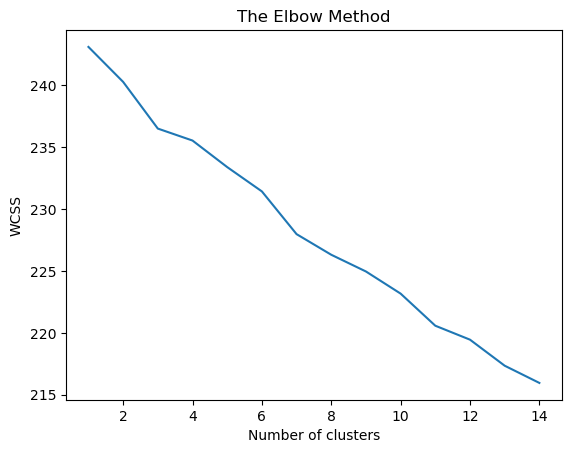

In [187]:
# Определяем кол-во кластеров для метода K-means
from sklearn.cluster import KMeans
X = tfidf_matrix
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [345]:
num_clusters = 10

# Метод к-средних - KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=num_clusters)

In [347]:
%%time
km.fit(tfidf_matrix)

CPU times: total: 46.9 ms
Wall time: 54.6 ms


KMeans(n_clusters=10)

In [349]:
idx = km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [351]:
len(km.labels_)

250

In [353]:
clusters[:10]

[3, 7, 7, 4, 9, 5, 6, 5, 7, 0]

In [355]:
clusterkm = km.labels_.tolist()
df['cluster']= clusterkm

In [357]:
df['cluster'].value_counts()

cluster
7    56
5    29
0    28
3    26
8    24
2    23
4    21
9    20
6    12
1    11
Name: count, dtype: int64

In [359]:
df0 = df[df['cluster']==0]

In [361]:
df0.head(10)

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,prep_text,text_lemm,tokenize_text,tokenize_text2,tokenize_text3,cluster
9,"Хороший, плохой, злой",1966,2h 41m,Мошенничество на щедрости присоединяется к дву...,8.8,"Italy, Spain, West Germany, United States","Adventure, Western",мошенничество на щедрости присоединяется к дву...,мошенничество на щедрость присоединяться к два...,мошенничество щедрость присоединяться мужчина ...,союз против третий гонка найти целое состояние...,"[союз, против, третий, гонка, найти, целое, со...",0
10,Форрест Гамп,1994,2h 22m,История Соединенных Штатов с 1950 -х годов до ...,8.8,United States,"Drama, Romance",история соединенных штатов с 1950 х годов до 7...,история соединить штат с 1950 х год до 70 х го...,история соединить штат 1950 х год 70 х год раз...,1950 70 разворачиваться точка зрение мужчина а...,"[1950, 70, разворачиваться, точка, зрение, муж...",0
59,Жизнь других,2006,2h 17m,В 1984 году в Восточном Берлине агент секретно...,8.4,"Germany, France","Drama, Mystery, Thriller",в 1984 году в восточном берлине агент секретно...,в 1984 год в восточный берлин агент секретный ...,1984 год восточный берлин агент секретный поли...,1984 полиция проводить наблюдение писатель люб...,"[1984, полиция, проводить, наблюдение, писател...",0
67,12-я неудача,2023,2h 27m,Реальная история офицера IPS Маноджа Кумара Ша...,8.8,India,"Biography, Drama",реальная история офицера ips маноджа кумара ша...,реальный история офицер ips манодж кумар шарм ...,реальный история офицер ips манодж кумар шарм ...,кумар шарм irs шраддх джоша,"[кумар, шарм, irs, шраддх, джоша]",0
77,"Доктор Стрейнджлав, или Как я научился не волн...",1964,1h 35m,Мраво неуравновешенная американская общая прик...,8.3,"United Kingdom, United States","Comedy, War",мраво неуравновешенная американская общая прик...,мраво неуравновешенный американский общий прик...,мраво неуравновешенный американский общий прик...,приступ водородный бомба советский союз иниции...,"[приступ, водородный, бомба, советский, союз, ...",0
86,Однажды в Америке,1984,3h 49m,Бывший еврейский гангстер эпохи запрета возвра...,8.3,"Italy, United States","Crime, Drama",бывший еврейский гангстер эпохи запрета возвра...,бывший еврейский гангстер эпоха запрет возвращ...,бывший еврейский гангстер эпоха запрет возвращ...,возвращаться нижний восточный сторона манхетте...,"[возвращаться, нижний, восточный, сторона, ман...",0
88,Поющие под дождём,1952,1h 43m,Звезда немой кино влюбляется в припевную девуш...,8.3,United States,"Comedy, Musical, Romance",звезда немой кино влюбляется в припевную девуш...,звезда немой кино влюбляться в припевный девуш...,звезда немой кино влюбляться припевный девушка...,девушка бредовый ревнивый экранный партнёр пыт...,"[девушка, бредовый, ревнивый, экранный, партнё...",0
101,Лицо со шрамом,1983,2h 50m,В 1980-х годах определенный кубинский иммигран...,8.3,United States,"Crime, Drama",в 1980х годах определенный кубинский иммигрант...,в 1980ха год определённый кубинский иммигрант ...,1980ха год определённый кубинский иммигрант на...,1980ха преступник становиться крупный контраба...,"[1980ха, преступник, становиться, крупный, кон...",0
118,Индиана Джонс и последний крестовый поход,1989,2h 7m,"В 1938 году, после того, как его отец пропал б...",8.2,United States,"Action, Adventure",в 1938 году после того как его отец пропал без...,в 1938 год после тот как он отец пропасть без ...,1938 год отец пропасть вести преследовать свят...,1938 святой грааль индиана джонс снова оказыва...,"[1938, святой, грааль, индиана, джонс, снова, ...",0
122,Секреты Лос-Анджелеса,1997,2h 18m,По мере роста коррупции в 1950 -х годах Лос -А...,8.2,United States,"Crime, Drama, Mystery",по мере роста коррупции в 1950 х годах лос анд...,по мера рост коррупция в 1950 х год лос анджел...,мера рост коррупция 1950 х год лос анджелес по...,1950 лос анджелес полицейский проливный жесток...,"[1950, лос, анджелес, полицейский, проливный, ...",0


In [363]:
gensim_dictionary = gensim.corpora.Dictionary(df0['tokenize_text3'])

In [365]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df0['tokenize_text3']]

In [367]:
lda_5 = gensim.models.LdaMulticore(corpus,
                                 num_topics=5,
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [368]:
lda_5.print_topics()

[(0,
  '0.026*"год" + 0.018*"сторона" + 0.018*"44летний" + 0.018*"1930" + 0.010*"состояние" + 0.010*"золото" + 0.010*"похоронить" + 0.010*"целое" + 0.010*"гонка" + 0.010*"отдалить"'),
 (1,
  '0.020*"проводить" + 0.011*"сожаление" + 0.011*"жизнь" + 0.011*"военный" + 0.011*"американский" + 0.011*"третий" + 0.011*"преступник" + 0.011*"год" + 0.011*"высокий" + 0.011*"становиться"'),
 (2,
  '0.022*"год" + 0.022*"точка" + 0.022*"зрение" + 0.012*"х" + 0.012*"афроамериканский" + 0.012*"написать" + 0.012*"право" + 0.012*"ежедневно" + 0.012*"горничная" + 0.012*"описываться"'),
 (3,
  '0.018*"сила" + 0.010*"1950" + 0.010*"святой" + 0.010*"мужчина" + 0.010*"собственный" + 0.010*"против" + 0.010*"оказываться" + 0.010*"бездомный" + 0.010*"калифорния" + 0.010*"присоединяться"'),
 (4,
  '0.023*"пытаться" + 0.016*"х" + 0.016*"сделать" + 0.016*"год" + 0.016*"девушка" + 0.008*"убийство" + 0.008*"коррупция" + 0.008*"анджелес" + 0.008*"лос" + 0.008*"правительство"')]

In [369]:
vis_20 = gensimvis.prepare(lda_5, corpus, gensim_dictionary)

In [370]:
pyLDAvis.enable_notebook()

In [371]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.114210  0.059116       1        1  26.206860
3     -0.101347  0.015798       2        1  21.583344
0      0.039472 -0.108459       3        1  20.743053
1     -0.026047  0.050649       4        1  16.683674
2     -0.026288 -0.017105       5        1  14.783068, topic_info=                 Term      Freq     Total Category  logprob  loglift
23              точка  2.000000  2.000000  Default  30.0000  30.0000
20             зрение  2.000000  2.000000  Default  29.0000  29.0000
31          проводить  1.000000  1.000000  Default  28.0000  28.0000
51           пытаться  2.000000  2.000000  Default  27.0000  27.0000
101              сила  2.000000  2.000000  Default  26.0000  26.0000
..                ...       ...       ...      ...      ...      ...
20             зрение  1.057532  2.062567   Topic5  -3.8223   1.2437
58                год  1.058651  5.421788   Topic5  -3.8213   0.2783
79                  х  0.576810  2.779703   Topic5  -4.4285   0.3391
127  афроамериканский  0.576805  1.582085   Topic5  -4.4285   0.9027
61            призрак  0.576527  1.569115   Topic5  -4.4290   0.9104

[217 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
179       1  0.873346      1890
68        1  0.873346      1920
157       3  0.610690      1930
92        2  0.907766      1938
134       4  0.959647      1947
...     ...       ...       ...
79        5  0.359751         х
10        3  0.918603     целое
258       2  0.907766      чаша
156       5  0.980130     штамп
80        1  0.873346  экранный

[217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 1, 2, 3])

In [372]:
df1 = df[df['cluster']==1]

In [373]:
df1.head(10)

,Название,Год выпуска,Длительность,Описание_перевод,Рейтинг,Страна,Жанр,prep_text,text_lemm,tokenize_text,tokenize_text2,tokenize_text3,cluster
11,Властелин колец: Две крепости,2002,2h 59m,В то время как Фродо и Сэм Эдж ближе к Мордору...,8.8,"New Zealand, United States","Adventure, Drama, Fantasy",в то время как фродо и сэм эдж ближе к мордору...,в то время как фродый и сэм эдж близкий к морд...,время фродый сэм эдж близкий мордору помощь sh...,мордору помощь shifty gollum разделить общение...,"[мордору, помощь, shifty, gollum, разделить, о...",1
23,Спасти рядового Райана,1998,2h 49m,После посадки в Нормандии группа солдат США ид...,8.6,United States,"Drama, War",после посадки в нормандии группа солдат сша ид...,после посадка в нормандия группа солдат сша ид...,посадка нормандия группа солдат сша идти враже...,идти вражеский линия забрать десантник чей бра...,"[идти, вражеский, линия, забрать, десантник, ч...",1
28,Звёздные войны: Эпизод 4 - Новая надежда,1977,2h 1m,Люк Скайуокер объединяет усилия с рыцарем-джед...,8.6,United States,"Action, Adventure, Fantasy",люк скайуокер объединяет усилия с рыцаремджеда...,люк скайуокер объединять усилие с рыцаремджеда...,люк скайуокер объединять усилие рыцаремджедать...,рыцаремджедать дерзкий пилот вук дроид галакти...,"[рыцаремджедать, дерзкий, пилот, вук, дроид, г...",1
52,Джанго освобождённый,2012,2h 45m,"С помощью немецкой охотника за щедрости, освоб...",8.5,United States,Western,с помощью немецкой охотника за щедрости освобо...,с помощь немецкий охотник за щедрость освободи...,помощь немецкий охотник щедрость освободить ра...,раб собираться спасти жена жестокий владелец п...,"[раб, собираться, спасти, жена, жестокий, влад...",1
63,Тропы славы,1957,1h 28m,Полковник защищает трех своих солдат в военном...,8.4,United States,"Drama, War",полковник защищает трех своих солдат в военном...,полковник защищать три свой солдат в военный с...,полковник защищать солдат военный суд отказыва...,отказываться суицидальный атака,"[отказываться, суицидальный, атака]",1
103,На север через северо-запад,1959,2h 16m,Руководитель по рекламе в Нью -Йорке идет в бе...,8.3,United States,"Adventure, Drama, Mystery",руководитель по рекламе в нью йорке идет в бег...,руководитель по реклама в нью йорк идти в бега...,руководитель реклама нью йорк идти бега принят...,бега принять правительственный агент группа ин...,"[бега, принять, правительственный, агент, груп...",1
111,Заводной апельсин,1971,2h 16m,Алекс Деярдж и его Droogs варварся разлагаются...,8.2,"United Kingdom, United States","Crime, Sci-Fi",алекс деярдж и его droogs варварся разлагаются...,алекс деярдж и он droogs варварсить разлагатьс...,алекс деярдж droogs варварсить разлагаться бли...,близкий время,"[близкий, время]",1
123,Похитители велосипедов,1948,1h 29m,В послевоенной Италии похищен велосипед рабоче...,8.2,Italy,Drama,в послевоенной италии похищен велосипед рабоче...,в послевоенный италия похитить велосипед рабоч...,послевоенный италия похитить велосипед рабочий...,класс угрожать усилие поиск работа сын решить ...,"[класс, угрожать, усилие, поиск, работа, сын, ...",1
204,Паровоз Генерал,1926,1h 18m,"После того, как его отвергли военные Конфедера...",8.1,United States,"Action, Adventure, Comedy",после того как его отвергли военные конфедерац...,после тот как он отвергнуть военный конфедерац...,отвергнуть военный конфедерация осознавать про...,произойти изз важный гражданский роль инженер ...,"[произойти, изз, важный, гражданский, роль, ин...",1
223,Отель «Руанда»,2004,2h 1m,"Пол Русесабагина, менеджер отеля, размещает бо...",8.1,"United States, United Kingdom, South Africa, I...","Biography, Drama, History",пол русесабагина менеджер отеля размещает боле...,пол русесабагин менеджер отель размещать более...,пол русесабагин менеджер отель размещать тысяч...,тысяча беженец тутси время борьба милиция хут ...,"[тысяча, беженец, тутси, время, борьба, милици...",1


In [374]:
def lda5_model(df):
    gensim_dictionary = gensim.corpora.Dictionary(df['tokenize_text3'])

    corpus = [gensim_dictionary.doc2bow(text) for text in df['tokenize_text3']]

    lda_5 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

    print(lda_5.print_topics())
    vis_5 = gensimvis.prepare(lda_5, corpus, gensim_dictionary)
    display(vis_5)

In [375]:
lda5_model(df1)

[(0, '0.022*"время" + 0.022*"чей" + 0.022*"группа" + 0.022*"начинать" + 0.022*"правительственный" + 0.022*"сомневаться" + 0.022*"принять" + 0.022*"лояльность" + 0.022*"бега" + 0.022*"женщина"'), (1, '0.043*"плантация" + 0.043*"раб" + 0.043*"жестокий" + 0.043*"жена" + 0.043*"спасти" + 0.043*"миссисипи" + 0.043*"собираться" + 0.043*"владелец" + 0.007*"втянутый" + 0.007*"шпион"'), (2, '0.028*"дарт" + 0.028*"дроид" + 0.028*"пилот" + 0.028*"также" + 0.028*"станция" + 0.028*"вук" + 0.028*"пытаться" + 0.028*"рыцаремджедать" + 0.028*"таинственный" + 0.028*"принцесса"'), (3, '0.053*"суицидальный" + 0.053*"отказываться" + 0.053*"атака" + 0.009*"время" + 0.009*"близкий" + 0.009*"шпион" + 0.009*"усилие" + 0.009*"чей" + 0.009*"сын" + 0.009*"найти"'), (4, '0.041*"линия" + 0.041*"вражеский" + 0.022*"шпион" + 0.022*"усилие" + 0.022*"союзный" + 0.022*"роль" + 0.022*"изз" + 0.022*"инженер" + 0.022*"одиночка" + 0.022*"повторно"')]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.125858  0.043114       1        1  33.489537
4      0.106146  0.082369       2        1  30.980326
2      0.027093 -0.122895       3        1  22.947489
1     -0.004284 -0.003980       4        1   8.606061
3     -0.003096  0.001392       5        1   3.976588, topic_info=            Term      Freq     Total Category  logprob  loglift
49  суицидальный  0.000000  0.000000  Default  30.0000  30.0000
48  отказываться  0.000000  0.000000  Default  29.0000  29.0000
47         атака  0.000000  0.000000  Default  28.0000  28.0000
43     плантация  0.000000  0.000000  Default  27.0000  27.0000
44           раб  0.000000  0.000000  Default  26.0000  26.0000
..           ...       ...       ...      ...      ...      ...
89         тутси  0.036952  1.093495   Topic5  -4.7274  -0.1628
91           хут  0.036951  1.093495   Topic5  -4.7274  -0.1628
15          брат  0.036951  1.067707   Topic5  -4.7274  -0.1389
85       беженец  0.036951  1.093496   Topic5  -4.7274  -0.1628
21         убить  0.036951  1.067707   Topic5  -4.7274  -0.1389

[226 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.914602  gollum
1         1  0.914610  shifty
50        1  0.914496   агент
84        1  0.914499  африка
51        1  0.914496    бега
...     ...       ...     ...
22        1  0.588102     чей
22        2  0.588102     чей
61        1  0.443919   шпион
61        2  0.443919   шпион
61        3  0.443919   шпион

[92 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 2, 4])